In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(x1, x2):
    return np.exp(-np.linalg.norm(np.subtract(x1, x2)))

def radial_basis_function_interpolation(dataset, phi):
    weights = np.linalg.solve(np.array([[phi(xi, xj) for xj in dataset[:, :2]] for xi in dataset[:, :2]]), dataset[:, 2])
    return weights

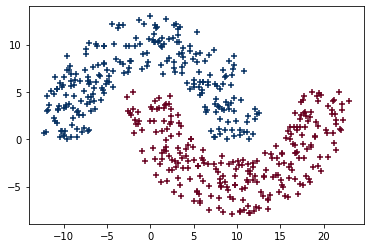

In [3]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import double_moon, visualize_data
    dataset = double_moon(500, d=-5)
    np.random.shuffle(dataset)
    w = radial_basis_function_interpolation(dataset, phi)
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    for example in dataset[:, :2]:
        y = np.dot(np.array([phi(example, xj) for xj in dataset[:, :2]]), w)
        ax.scatter(example[0], example[1], color=plt.cm.RdBu(np.sign(y)), marker="+")
    #visualize_data(dataset, ax)
    #t = np.linspace(-13, 23, 50)
    #for i in t:
    #    for j in t:
    #        tmp = np.array([i, j])
    #        y = np.dot(np.array([phi(tmp, xj) for xj in dataset[:, :2]]), w)
    #        ax.scatter(i, j, color=plt.cm.RdBu(np.sign(y)), marker="+")
    plt.show()